<a href="https://colab.research.google.com/github/AndrewMarksArt/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [2]:
cell_phones.head() # explore cell_phones df

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [3]:
population.head() # explore population df

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [4]:
geo_country_codes.head() # explore geo_country_codes df

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [5]:
cell_phones.shape, geo_country_codes.shape, population.shape # look at the shape of all df's

((9215, 3), (273, 33), (59297, 3))

In [6]:
cell_phones.dtypes # explore data types before merging with population

geo                   object
time                   int64
cell_phones_total    float64
dtype: object

In [7]:
cell_phones['time'].describe

<bound method NDFrame.describe of 0       1960
1       1965
2       1970
3       1975
4       1976
5       1977
6       1978
7       1979
8       1980
9       1981
10      1982
11      1983
12      1984
13      1985
14      1986
15      1987
16      1988
17      1989
18      1990
19      1991
20      1992
21      1995
22      1996
23      1997
24      1998
25      1999
26      2000
27      2001
28      2002
29      2003
        ... 
9185    1988
9186    1989
9187    1990
9188    1991
9189    1992
9190    1993
9191    1994
9192    1995
9193    1996
9194    1997
9195    1998
9196    1999
9197    2000
9198    2001
9199    2002
9200    2003
9201    2004
9202    2005
9203    2006
9204    2007
9205    2008
9206    2009
9207    2010
9208    2011
9209    2012
9210    2013
9211    2014
9212    2015
9213    2016
9214    2017
Name: time, Length: 9215, dtype: int64>

In [8]:
population.dtypes # explore data types before merging with cell_phones

geo                 object
time                 int64
population_total     int64
dtype: object

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
cell_phones_pop_merged = pd.merge(left=cell_phones, right=population, on=['geo', 'time'], how='inner') # merge cell phone and population on geo and time

In [10]:
cell_phones_pop_merged.shape # check shape to make sure the merge produced the df we want

(8590, 4)

In [11]:
cell_phones_pop_merged.head() # explore ne merged df

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [12]:
geo_country = geo_country_codes[['geo', 'country']] # split geo_country_codes to get the two columns we need 
geo_country.head()                                  # make sure we have only the columns want

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


In [13]:
merged = cell_phones_pop_merged.merge(geo_country, how='inner', on='geo') # merge the cell phone population df with the slice of geo_country_codes 
merged.head()                                                             # explore the final df

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


In [14]:
merged.shape

(8590, 5)

***Optional bonus for Part 1: Take initiative to join more data.***

### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
merged['cell_phones_per_person'] = merged['cell_phones_total'] / merged['population_total'] # create new column of cell phones per person

In [0]:
usa = merged[merged['country'] == 'United States']   # check to make sure cell phones per person is correct by looking up USA 2017 and making sure it = 1.220

In [17]:
usa.tail()

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
8130,usa,2013,310698000.0,315536676,United States,0.984665
8131,usa,2014,355500000.0,317718779,United States,1.118914
8132,usa,2015,382307000.0,319929162,United States,1.194974
8133,usa,2016,395881000.0,322179605,United States,1.228759
8134,usa,2017,395881000.0,324459463,United States,1.220125


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
merged['geo'] = merged['geo'].str.upper()

In [19]:
merged.head()

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


***Optional bonus for Part 2: Take initiative to make more features.***

### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [21]:
merged.dtypes

geo                        object
time                        int64
cell_phones_total         float64
population_total            int64
country                    object
cell_phones_per_person    float64
dtype: object

In [20]:
merged.describe()   # describe fuction to look at the numeric columns

,time,cell_phones_total,population_total,cell_phones_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [22]:
merged.describe(include='all')    # describe function using include parameter set to 'all' to get non-numeric data as well as numeric

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
count,8590,8590.000000,8.590000e+03,8.590000e+03,8590,8590.000000
unique,195,NaN,NaN,NaN,195,NaN
top,CPV,NaN,NaN,NaN,Indonesia,NaN
freq,46,NaN,NaN,NaN,46,NaN
mean,NaN,1994.193481,9.004950e+06,2.983823e+07,NaN,0.279639
std,NaN,14.257975,5.573408e+07,1.161284e+08,NaN,0.454247
min,NaN,1960.000000,0.000000e+00,4.433000e+03,NaN,0.000000
25%,NaN,1983.000000,0.000000e+00,1.456148e+06,NaN,0.000000
50%,NaN,1995.000000,6.200000e+03,5.725062e+06,NaN,0.001564
75%,NaN,2006.000000,1.697652e+06,1.810581e+07,NaN,0.461149


In [0]:
merged['country'].nunique()

195

In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [0]:
yr_2017 = merged[merged['time'] == 2017]
yr_2017.head()

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
45,AFG,2017,"23,929,713.0",35530081,Afghanistan,0.6735057260353557
91,AGO,2017,"13,323,952.0",29784193,Angola,0.4473497737541521
137,ALB,2017,"3,497,950.0",2930187,Albania,1.19376340144844
183,AND,2017,"80,337.0",76965,Andorra,1.0438121223932957
219,ARE,2017,"19,826,224.0",9400145,United Arab Emirates,2.109140231347495


In [0]:
sort_cell_phones = yr_2017[['cell_phones_total', 'country']].sort_values(by='cell_phones_total', ascending=False)

In [0]:
sort_cell_phones.head(5)

,cell_phones_total,country
1496,"1,474,097,000.0",China
3595,"1,168,902,277.0",India
3549,"458,923,202.0",Indonesia
8134,"395,881,000.0",United States
1084,"236,488,548.0",Brazil


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [0]:
usa[usa['cell_phones_total'] > usa['population_total']].sort_values(by='cell_phones_total') # 2014 is the first year there were more cell phones than people in the USA

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
8131,usa,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,usa,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,usa,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,usa,2017,"395,881,000.0",324459463,United States,1.2201246847283354


***Optional bonus for Part 3: Take initiative to do more exploratory data analysis.***

### (OPTIONAL) Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick


url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [3]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [0]:
df.describe()

,Year
count,2693.000000
mean,2006.816190
std,4.828177
min,1999.000000
25%,2003.000000
50%,2007.000000
75%,2011.000000
max,2015.000000


In [0]:
pd.options.display.float_format = '{:.2f}'.format

In [0]:
table = pd.crosstab(index=df['Year'], columns=df['Group'], normalize='index')

In [6]:
table

Group,Academic,Acting,Advocacy,Athletics,Business,Clergy,Comedy,Consultant,Government,Media,Military,Misc,Musician,Political Aide,Politician,Science,media
Year,,,,,,,,,,,,,,,,,
1999,0.00,0.66,0.00,0.00,0.00,0.00,0.15,0.00,0.00,0.07,0.00,0.00,0.10,0.00,0.01,0.00,0.00
2000,0.00,0.61,0.01,0.02,0.01,0.00,0.07,0.00,0.00,0.13,0.00,0.00,0.08,0.01,0.08,0.00,0.00
2001,0.01,0.59,0.00,0.01,0.00,0.00,0.07,0.00,0.01,0.19,0.00,0.01,0.07,0.01,0.02,0.00,0.01
2002,0.00,0.54,0.01,0.01,0.00,0.01,0.03,0.00,0.01,0.25,0.00,0.01,0.06,0.01,0.05,0.00,0.02
2003,0.03,0.47,0.00,0.00,0.00,0.01,0.08,0.01,0.01,0.26,0.00,0.01,0.04,0.01,0.09,0.01,0.00
2004,0.01,0.32,0.02,0.01,0.01,0.01,0.04,0.02,0.02,0.28,0.00,0.00,0.03,0.01,0.20,0.01,0.00
2005,0.07,0.27,0.00,0.01,0.01,0.00,0.03,0.01,0.01,0.33,0.01,0.02,0.07,0.02,0.14,0.01,0.00
2006,0.06,0.28,0.00,0.03,0.01,0.00,0.05,0.03,0.02,0.29,0.01,0.02,0.04,0.02,0.16,0.01,0.00
2007,0.09,0.18,0.01,0.03,0.01,0.01,0.06,0.01,0.01,0.34,0.02,0.01,0.01,0.01,0.15,0.03,0.00


In [0]:
df2 = table['Acting'] + table['Comedy'] + table['Musician']
df3 = table['Government'] + table['Political Aide'] + table['Politician']

In [0]:
df2['sum'] = table['Acting'] + table['Comedy'] + table['Musician']
df3['sum'] = table['Government'] + table['Political Aide'] + table['Politician']

### Part 2 — Recreate this explanatory visualization:

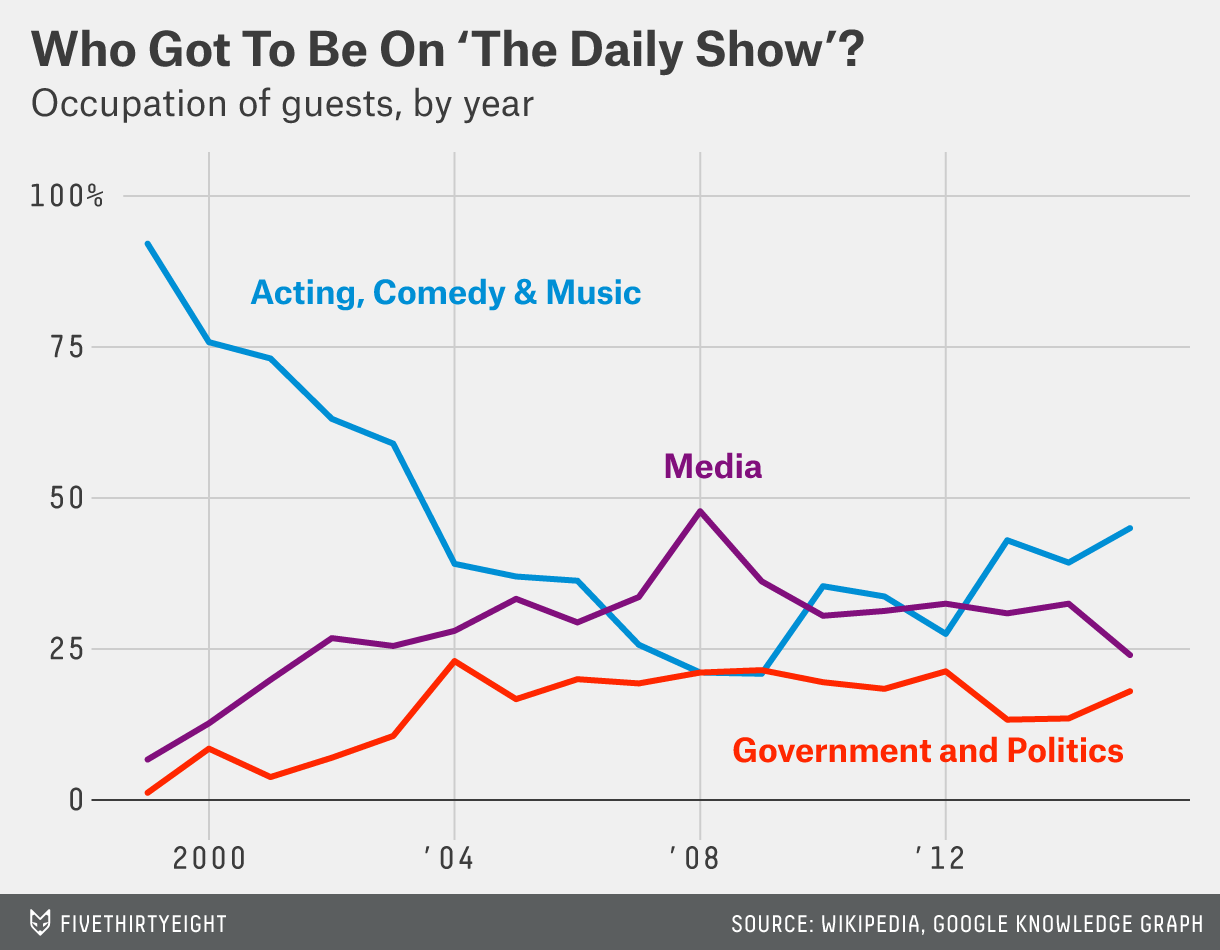

In [9]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

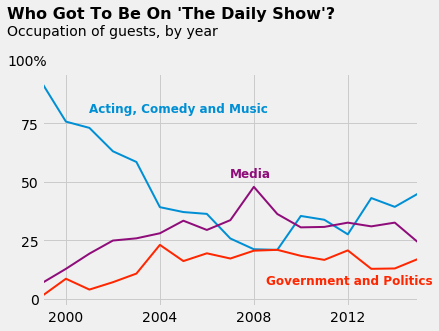

In [81]:
plt.style.use('fivethirtyeight')

x_axis = plt.axes().axes.get_xaxis()
x_axis.label.set_visible(False)

plt.yticks(range(0,100,25))
plt.xticks(range(2000,2016,4))

plt.text(x=1997.5,y=120,s="Who Got To Be On 'The Daily Show'?",weight="bold",size=16)
plt.text(x=1997.5,y=113,s="Occupation of guests, by year")
plt.text(x=1997.5, y=100, s='100%')

plt.text(x=2001, y=80, s='Acting, Comedy and Music', color=(0, 0.56, 0.83), weight='bold',size=12)
plt.text(x=2007,y=52, s='Media', color=(.56, .05, .48), weight='bold',size=12)
plt.text(x=2008.5,y=6, s='Government and Politics', color=(1,.15,0.0), weight='bold',size=12)

df2['sum'].apply(lambda x: x*100).plot(color=(0, 0.56, 0.83), linewidth=2)
df3['sum'].apply(lambda x: x*100).plot(color=(1,.15,0.0), linewidth=2)
table['Media'].apply(lambda x: x*100).plot(color=(.56, .05, .48), linewidth=2);

### (OPTIONAL) Part 3 — Who were the top 10 guests on _The Daily Show_?

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)